# Heart Disease Risk Prediction

### Description

This dataset is curated for predictive modeling of heart disease risk using a variety of clinical symptoms, lifestyle factors, and demographic information. Each record represents an individual with binary indicators for common cardiovascular symptoms and risk factors, along with the target label indicating whether the individual is at risk of heart disease.

It is well-suited for classification tasks, particularly binary classification (high risk vs. low/no risk), and can be used in machine learning, statistical analysis, or clinical decision support systems.

Features Include:

- Symptoms:
    - Chest Pain
    - Shortness of Breath
    - Fatigue
    - Palpitations
    - Dizziness
    - Swelling
    - Pain in Arms, Jaw, or Back
    - Cold Sweats / Nausea

- Medical Conditions:
    - High Blood Pressure
    - High Cholesterol
    - Diabetes

- Lifestyle Factors:
    - Smoking
    - Obesity
    - Sedentary Lifestyle
    - Chronic Stress

- Demographics & History:
    - Gender
    - Age
    - Family History of Heart Disease

- Target Variable:
    - Heart_Risk — Indicates whether the individual is at risk of developing heart disease (binary label)

This dataset is ideal for training models that aim to predict heart disease risk from non-invasive indicators, aiding in early diagnosis and preventive healthcare strategies.

### Importing python modules

In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [470]:
df = pd.read_csv('heart_disease_risk_dataset_earlymed.csv')
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


### Dataset description

In [471]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


### Checking if there is any NaN value in the dataset

In [472]:
df.isna().sum()

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64

There is no NaN value, so we will proceed with the next operation.

### Removing the duplicate rows

#### Check the number of duplicate rows

In [473]:
df.duplicated().sum()

np.int64(6245)

#### Remove the duplicate rows

In [474]:
df.drop_duplicates(inplace=True)

### Dataset description after cleanup

In [475]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000
mean,0.493891,0.495145,0.493514,0.493499,0.496839,0.493702,0.496636,0.497608,0.494502,0.495443,0.497655,0.499365,0.495726,0.500494,0.493797,0.495679,0.544757,54.328210,0.493875
std,0.499967,0.499980,0.499962,0.499962,0.499994,0.499964,0.499993,0.499998,0.499974,0.499983,0.499998,0.500004,0.499986,0.500004,0.499965,0.499985,0.497997,16.414121,0.499966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,55.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


### Dataset histogram

array([[<Axes: title={'center': 'Chest_Pain'}>,
        <Axes: title={'center': 'Shortness_of_Breath'}>,
        <Axes: title={'center': 'Fatigue'}>,
        <Axes: title={'center': 'Palpitations'}>],
       [<Axes: title={'center': 'Dizziness'}>,
        <Axes: title={'center': 'Swelling'}>,
        <Axes: title={'center': 'Pain_Arms_Jaw_Back'}>,
        <Axes: title={'center': 'Cold_Sweats_Nausea'}>],
       [<Axes: title={'center': 'High_BP'}>,
        <Axes: title={'center': 'High_Cholesterol'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Smoking'}>],
       [<Axes: title={'center': 'Obesity'}>,
        <Axes: title={'center': 'Sedentary_Lifestyle'}>,
        <Axes: title={'center': 'Family_History'}>,
        <Axes: title={'center': 'Chronic_Stress'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Heart_Risk'}>, <Axes: >]], dtype=object)

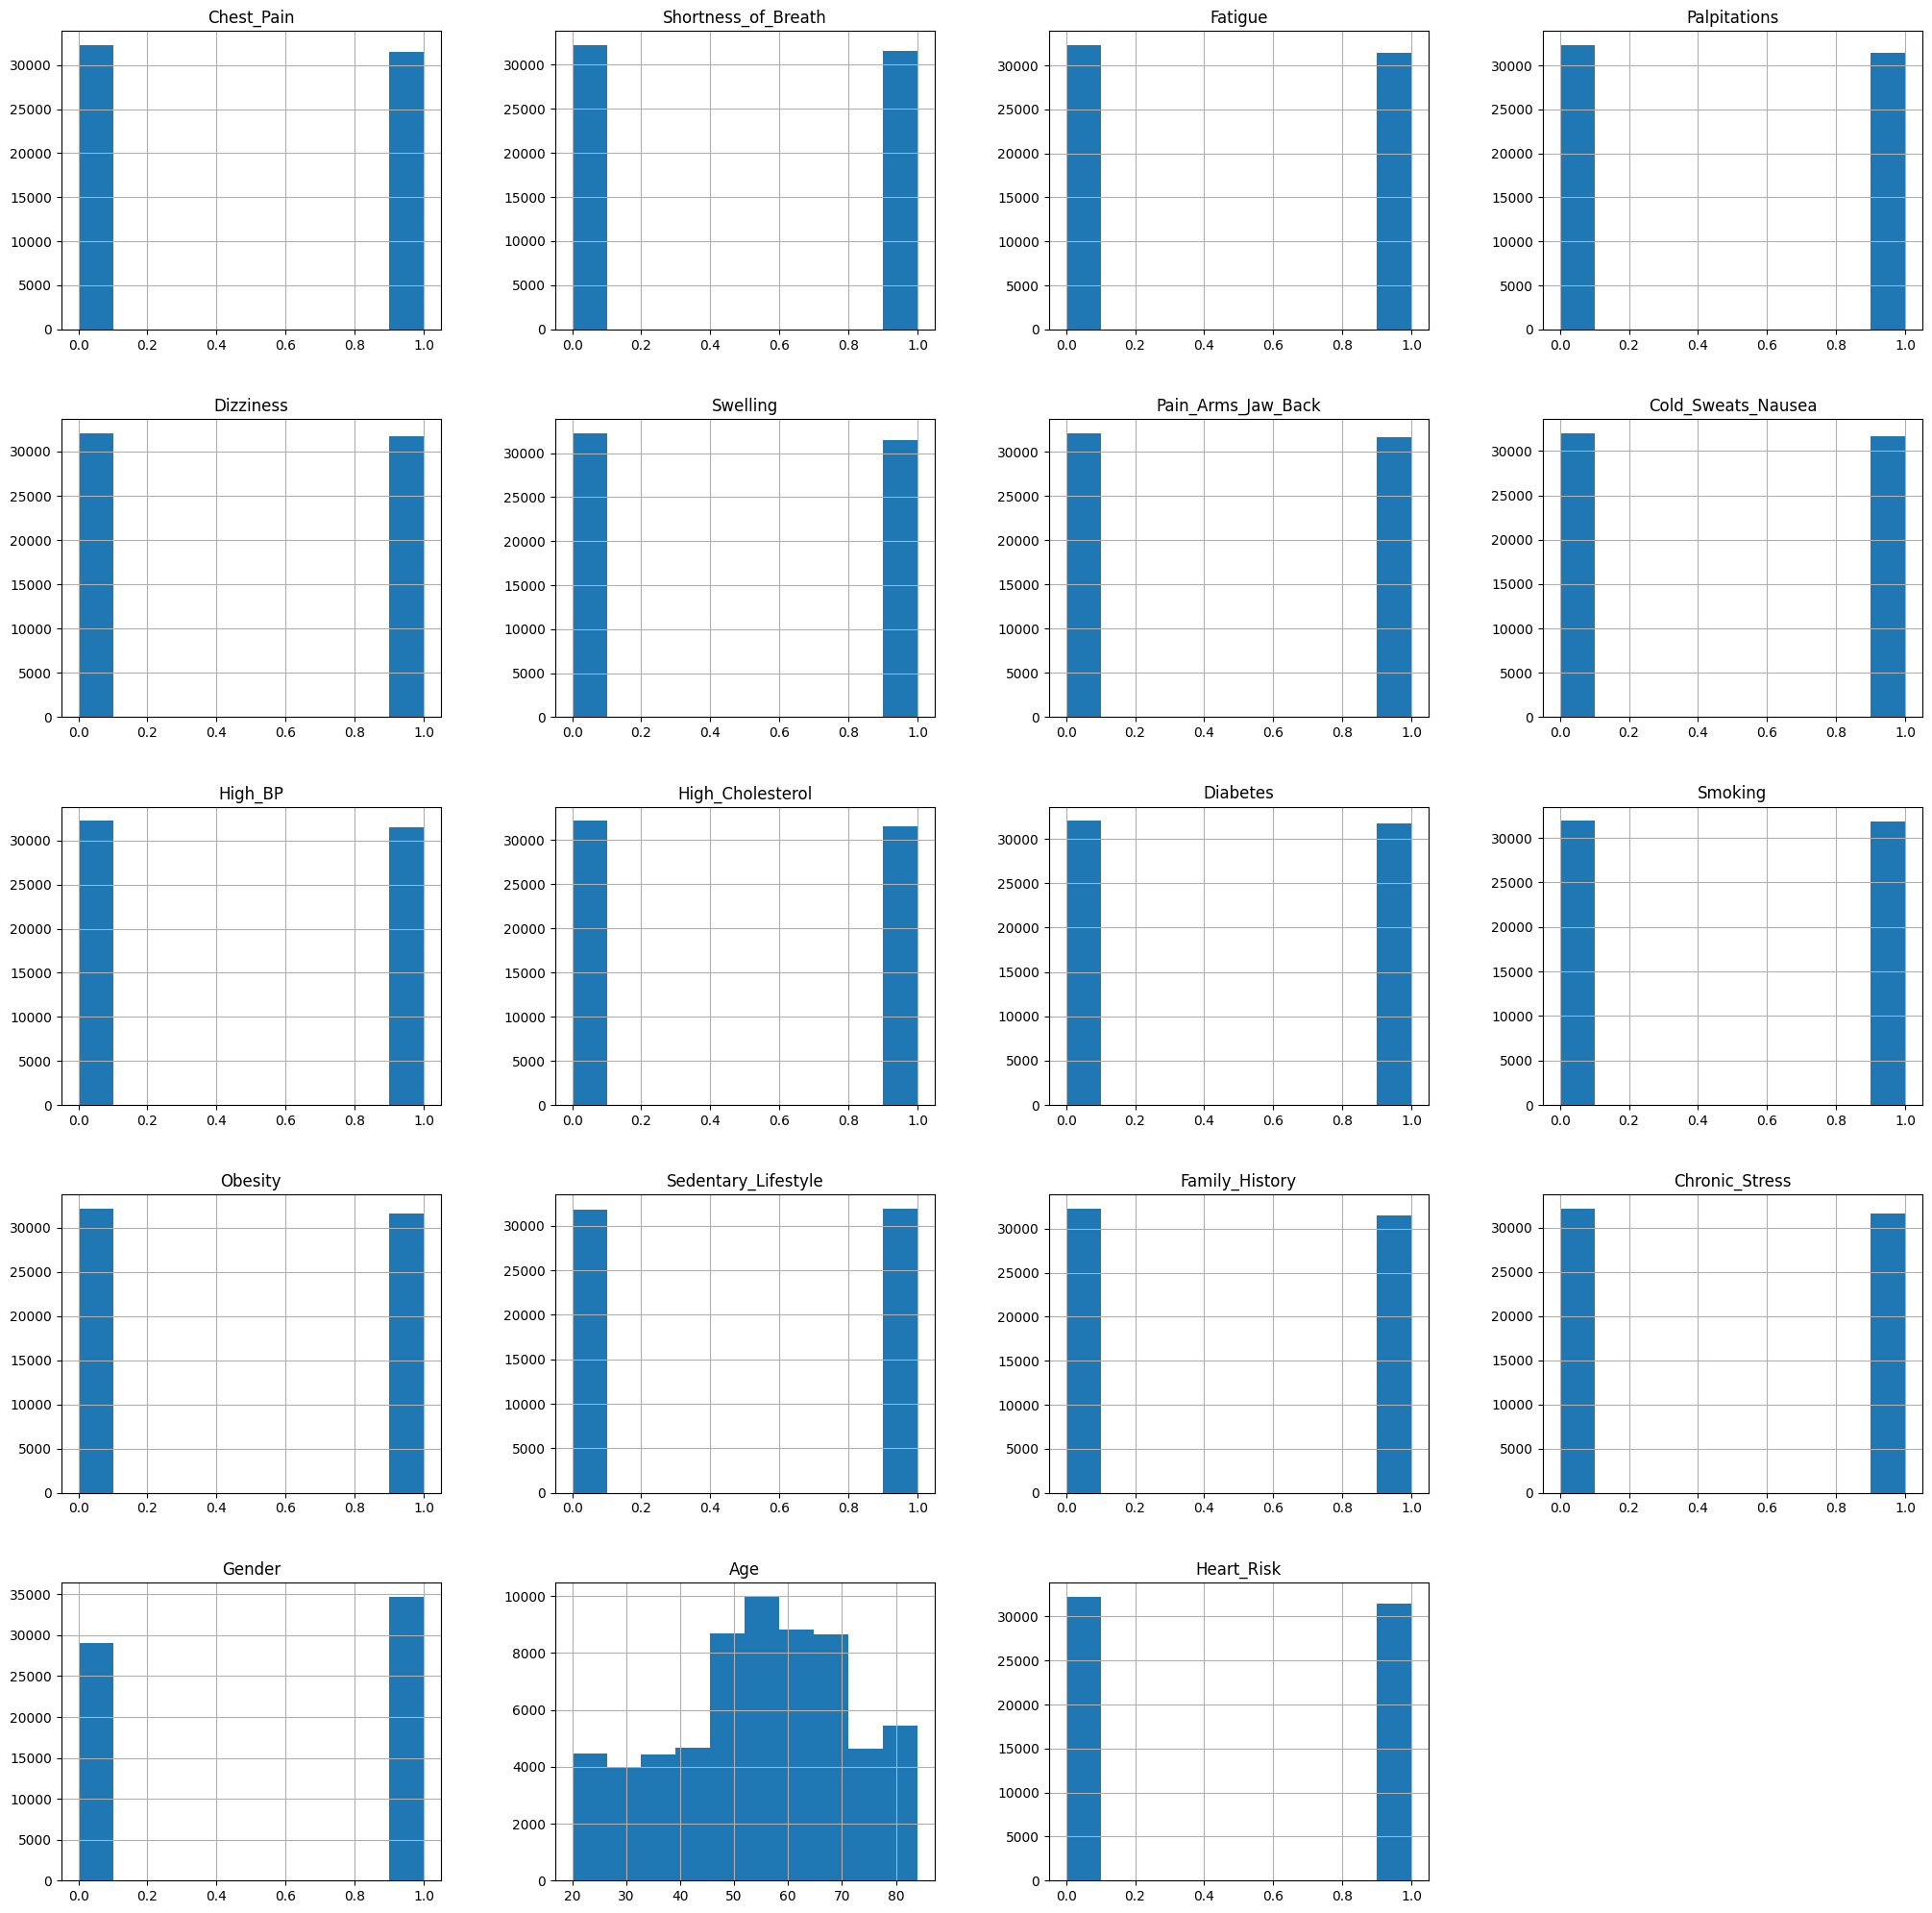

In [476]:
df.hist(figsize=(25, 25))

### Correlation matrix

In [477]:
corr = df.corr()
corr

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
Chest_Pain,1.000000,0.321511,0.323115,0.320447,0.318846,0.318160,0.325712,0.327552,0.214984,0.209167,0.208870,0.208878,0.214067,0.211604,0.205463,0.214976,0.152372,0.351674,0.575342
Shortness_of_Breath,0.321511,1.000000,0.321632,0.320848,0.326696,0.317556,0.318316,0.319210,0.212621,0.212133,0.207935,0.210005,0.210004,0.212223,0.208375,0.214490,0.152457,0.347402,0.572722
Fatigue,0.323115,0.321632,1.000000,0.323327,0.320413,0.327127,0.330479,0.322155,0.213346,0.211798,0.211692,0.210510,0.209420,0.214242,0.206523,0.212023,0.149102,0.346416,0.575590
Palpitations,0.320447,0.320848,0.323327,1.000000,0.325464,0.320507,0.322855,0.323316,0.216703,0.210009,0.209213,0.210165,0.207380,0.212579,0.211009,0.203144,0.147939,0.344062,0.572232
Dizziness,0.318846,0.326696,0.320413,0.325464,1.000000,0.325559,0.322785,0.328315,0.213845,0.214103,0.207066,0.204733,0.208836,0.211837,0.209729,0.208176,0.156873,0.347220,0.575069
Swelling,0.318160,0.317556,0.327127,0.320507,0.325559,1.000000,0.327280,0.326987,0.213098,0.211737,0.206485,0.207247,0.210112,0.209409,0.212613,0.208699,0.152028,0.346160,0.573772
Pain_Arms_Jaw_Back,0.325712,0.318316,0.330479,0.322855,0.322785,0.327280,1.000000,0.324706,0.206468,0.217081,0.210673,0.211603,0.216581,0.211995,0.211827,0.211091,0.147303,0.349515,0.576289
Cold_Sweats_Nausea,0.327552,0.319210,0.322155,0.323316,0.328315,0.326987,0.324706,1.000000,0.210942,0.213269,0.207793,0.206710,0.207498,0.210359,0.206829,0.214431,0.155064,0.348551,0.576370
High_BP,0.214984,0.212621,0.213346,0.216703,0.213845,0.213098,0.206468,0.210942,1.000000,0.138931,0.137312,0.138948,0.139752,0.137467,0.138052,0.140096,0.101390,0.228842,0.380922
High_Cholesterol,0.209167,0.212133,0.211798,0.210009,0.214103,0.211737,0.217081,0.213269,0.138931,1.000000,0.138511,0.135936,0.134557,0.139408,0.140269,0.137474,0.101470,0.229091,0.380875


As we can see, The most significant factor contributing to heart disease is *Age*, followed by *Chest_Pain*, *Shortness_of_Breath*, *Fatigue*, *Palpitations*, *Diziness*, *Swelling*, *Pain_Arms_Jaw_Back* and *Cold_Sweats_Nausea*. Below will be plotted this matrix.

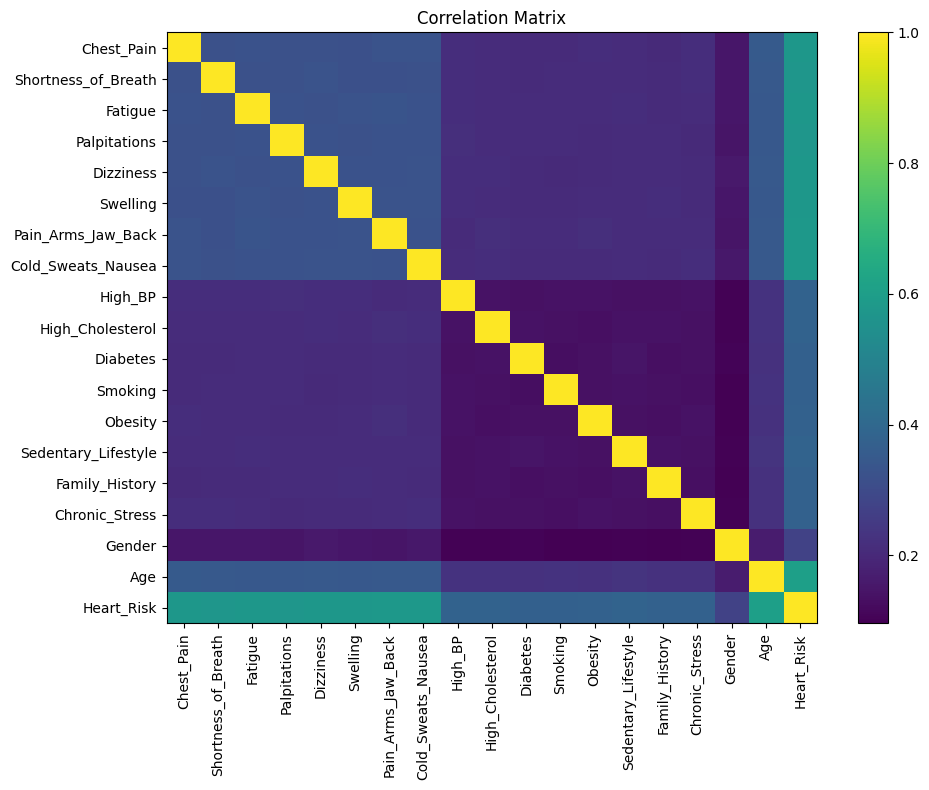

In [478]:
plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Gini Index

The Gini index (or Gini impurity) measures how mixed the classes are in a dataset. A Gini of 0 means all instances are of one class (perfect purity), while higher values indicate more mix. For a binary target, Gini can range up to 0.5 (when classes are 50/50, the maximum impurity). In our heart disease dataset, the target variable Heart_Risk is roughly 50% 0 and 50% 1, so the overall Gini impurity of the target is about 0.50 (quite impure, meaning without any features, the dataset is evenly split and uncertain).

In [479]:
counts = df['Heart_Risk'].value_counts(normalize=True)
gini_overall = 1 - (counts**2).sum()

gini_overall

np.float64(0.4999249685098226)

As we can see, the **gini index** is aproximately 50% (49.99%), as expected. But let's see for the other columns.

In [480]:
gini_indexes = []

for column in df.columns:
    counts = df[column].value_counts(normalize=True)
    gini = 1 - (counts**2).sum()
    
    gini_indexes.append((column, gini))

gini_indexes

[('Chest_Pain', np.float64(0.499925352301982)),
 ('Shortness_of_Breath', np.float64(0.49995286724756516)),
 ('Fatigue', np.float64(0.49991586968339685)),
 ('Palpitations', np.float64(0.49991546227325845)),
 ('Dizziness', np.float64(0.4999800220189681)),
 ('Swelling', np.float64(0.4999206818466265)),
 ('Pain_Arms_Jaw_Back', np.float64(0.499977361059996)),
 ('Cold_Sweats_Nausea', np.float64(0.4999885569661442)),
 ('High_BP', np.float64(0.4999395526118806)),
 ('High_Cholesterol', np.float64(0.4999584765175875)),
 ('Diabetes', np.float64(0.4999890027554985)),
 ('Smoking', np.float64(0.49999919292937234)),
 ('Obesity', np.float64(0.49996346286341264)),
 ('Sedentary_Lifestyle', np.float64(0.49999951177208946)),
 ('Family_History', np.float64(0.49992303478778854)),
 ('Chronic_Stress', np.float64(0.4999626539476305)),
 ('Gender', np.float64(0.4959935728590452)),
 ('Age', np.float64(0.9824259929242872)),
 ('Heart_Risk', np.float64(0.4999249685098226))]

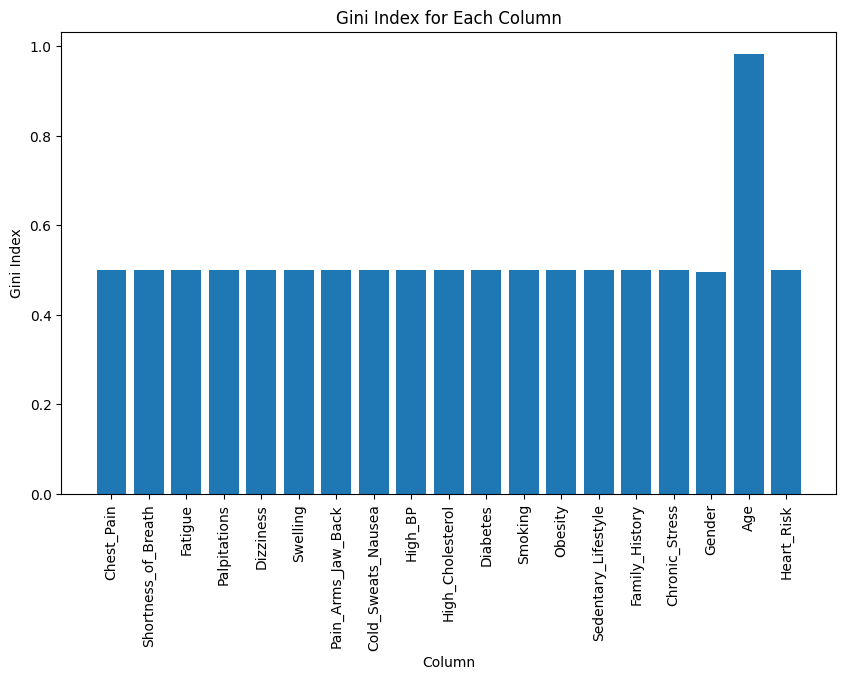

In [481]:
gini_values = [gini for _, gini in gini_indexes]
column_names = [column for column, _ in gini_indexes]

# Plot the gini indexes
plt.figure(figsize=(10, 6))
plt.bar(column_names, gini_values)
plt.xlabel('Column')
plt.ylabel('Gini Index')
plt.title('Gini Index for Each Column')
plt.xticks(rotation=90)
plt.show()

Given that, except for **Age**, every column in the dataset is binary (can only have the values 0 or 1), the interpretation of the Gini index can be as following:

- **Maximum Gini index for binary variables**

    For a binary variable, the maximum Gini index is *0.5*. This maximum is reached when the two classes are perfectly balanced (50% 0 values and 50% 1 values). Such balance indicates that the variable has a well-differentiated distribution, which is very useful for our predictive model.

- **Minimum Gini index for binary variables**

    A Gini index near *0* indicates a strong imbalance between the two classes (for example 90% 0 values and 10% 1 values). In such cases, one category dominates, meaning that the variable provides little variability and, consequently, may contribute less discriminative power to our model.

Fortunately, the indexes for binary columns are around 50%, which means that the classes are perfectly balanced for each column.

### Information Quantity

The formula for Information Quantity is:

*I(x) = -log(p)*

The base of the logarithm represents the number of classes the column could have and *p* represents the probability for an event.

Let's define a function that calculates the information quantity for a given binary column.

In [482]:
def calculate_information_quantity(column: str, base: int = 2) -> dict:
    counts = column.value_counts()
    probabilities = counts / counts.sum()
    info_qty = {}
    for value, prob in probabilities.items():
        info_qty[value] = -np.log(prob) / np.log(base) if prob > 0 else 0
    return info_qty

Now, we will call this function for each column to get the *Information Quantity*.

In [483]:
info_quantities = []

for column in df.columns:
    info = calculate_information_quantity(df[column])
    info_quantities.append((column, info))

    print(f"Information Quantity for {column}:")
    for outcome, info_val in info.items():
        print(f"  Outcome {outcome}: Information Quantity = {info_val:.3f} bits")
    print("-" * 50)

Information Quantity for Chest_Pain:
  Outcome 0.0: Information Quantity = 0.982 bits
  Outcome 1.0: Information Quantity = 1.018 bits
--------------------------------------------------
Information Quantity for Shortness_of_Breath:
  Outcome 0.0: Information Quantity = 0.986 bits
  Outcome 1.0: Information Quantity = 1.014 bits
--------------------------------------------------
Information Quantity for Fatigue:
  Outcome 0.0: Information Quantity = 0.981 bits
  Outcome 1.0: Information Quantity = 1.019 bits
--------------------------------------------------
Information Quantity for Palpitations:
  Outcome 0.0: Information Quantity = 0.981 bits
  Outcome 1.0: Information Quantity = 1.019 bits
--------------------------------------------------
Information Quantity for Dizziness:
  Outcome 0.0: Information Quantity = 0.991 bits
  Outcome 1.0: Information Quantity = 1.009 bits
--------------------------------------------------
Information Quantity for Swelling:
  Outcome 0.0: Information Q

### Entropy

The entropy of a random variable is the expected value (or average) of the self-information of its outcomes.

In [484]:
for col in df.columns:
    if col == "Age":
        continue

    counts = df[col].value_counts()
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))

    print(f"Entropy for {col}: {entropy:.3f} bits")

Entropy for Chest_Pain: 1.000 bits
Entropy for Shortness_of_Breath: 1.000 bits
Entropy for Fatigue: 1.000 bits
Entropy for Palpitations: 1.000 bits
Entropy for Dizziness: 1.000 bits
Entropy for Swelling: 1.000 bits
Entropy for Pain_Arms_Jaw_Back: 1.000 bits
Entropy for Cold_Sweats_Nausea: 1.000 bits
Entropy for High_BP: 1.000 bits
Entropy for High_Cholesterol: 1.000 bits
Entropy for Diabetes: 1.000 bits
Entropy for Smoking: 1.000 bits
Entropy for Obesity: 1.000 bits
Entropy for Sedentary_Lifestyle: 1.000 bits
Entropy for Family_History: 1.000 bits
Entropy for Chronic_Stress: 1.000 bits
Entropy for Gender: 0.994 bits
Entropy for Heart_Risk: 1.000 bits


## Models

### Initial setup

In [485]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

#### Splitting data into features and target

In [486]:
X = df.drop('Heart_Risk', axis=1)
y = df['Heart_Risk']

#### Train and test split

For the training, we will take 80% of the data and 20% will be part of the testing.

In [487]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
)

### Logistic Regression

Logistic Regression is a linear classification algorithm that models the probability of a binary outcome y ∈ {0,1} given an input feature vector x. Instead of fitting a straight‐line like in linear regression, it uses the sigmoid (logistic) function to squash the output of a linear combination into the [0,1] interval.

In [488]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#### Train and test split

In [489]:
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(
    X,
    y,
    test_size=0.3,
)

#### Define and train the model

In [490]:
lr_model = LogisticRegression(
    penalty='l1',
    C=0.0005,
    solver='saga',
    max_iter=1500,
)

lr_model.fit(lr_X_train, lr_y_train)

LogisticRegression(C=0.0005, max_iter=1500, penalty='l1', solver='saga')

#### Test the model

In [491]:
y_pred = lr_model.predict(lr_X_test)
y_pred_proba = lr_model.predict_proba(lr_X_test)[:, 1]

#### Evaluate the performance

In [492]:
accuracy = accuracy_score(lr_y_test, y_pred)
classification_rep = classification_report(lr_y_test, y_pred)
roc_auc = roc_auc_score(lr_y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.940
ROC AUC Score: 0.988
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      9709
         1.0       0.93      0.95      0.94      9418

    accuracy                           0.94     19127
   macro avg       0.94      0.94      0.94     19127
weighted avg       0.94      0.94      0.94     19127



### Random Forest

A **Random Forest** is an ensemble learning method that builds a "forest" of decision trees and combines their predictions to improve accuracy and control over‑fitting. Each tree is trained on a random subset of the data and, at each split, considers only a random subset of features. The final prediction is made by majority vote for classification.

How it works:

- **Bootstrap sampling**: From the original training set, draw B samples with replacement.
- **Tree building**: For each bootstrap sample, grow an unpruned decision tree. At each split, pick the best split only among a random subset of m features (typically *m = sqrt(p)* for lassification, where p is the total number of features).
- **Aggregation**: For a new instance, each tree votes on the class, and the forest predicts the class with the most votes.

In [493]:
from sklearn.ensemble import RandomForestClassifier

#### Train and test split

In [494]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.5,
    shuffle=False,
)

#### Define and train the model

In [495]:
model = RandomForestClassifier(
    max_depth=1,
    n_estimators=25,
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=25)

#### Test the model

In [496]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

#### Evaluate the performance

In [497]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.953
ROC AUC Score: 0.992
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     16212
         1.0       0.95      0.96      0.95     15666

    accuracy                           0.95     31878
   macro avg       0.95      0.95      0.95     31878
weighted avg       0.95      0.95      0.95     31878



### Extreme Gradient Boosting (XGBoost)

XGBoost is a powerful gradient‑boosting framework that builds an ensemble of decision trees in a stage‑wise fashion. At each stage, a new tree is trained to predict the residual errors (gradients) of the combined ensemble so far. By focusing each successive tree on the hardest‑to‑predict examples, XGBoost often delivers state‑of‑the‑art performance on structured data.

In [498]:
from xgboost import XGBClassifier

#### Train and test split

In [499]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.5,
    stratify=y,
)

#### Define and train the model

In [500]:
xgb = XGBClassifier(
    n_estimators=80,
    learning_rate=0.001,
    max_depth=1,
    subsample=0.4,
    colsample_bytree=0.4,
    reg_alpha=0.01,
    reg_lambda=1.0,
    eval_metric='logloss',
)
xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, ...)

#### Test the model

In [501]:
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

#### Evaluate performance

In [502]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.934
ROC AUC Score: 0.994
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     16134
         1.0       0.99      0.87      0.93     15744

    accuracy                           0.93     31878
   macro avg       0.94      0.93      0.93     31878
weighted avg       0.94      0.93      0.93     31878



### Final Model

Each algorithms performs exceptionally well. Based on the accuracies, Logistic Regression stands out as the top choice with an accuracy of ~ 94%. So, the chosen model is **Logistic Regression**.

#### Model performance evaluation

- accuracy
- precision, recall, F1-score
- ROC AUC score

In [503]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = lr_model.predict(lr_X_test)
y_prob = lr_model.predict_proba(lr_X_test)[:,1]

##### Classification Report

In [504]:
print(
    classification_report(lr_y_test, y_pred)
)

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      9709
         1.0       0.93      0.95      0.94      9418

    accuracy                           0.94     19127
   macro avg       0.94      0.94      0.94     19127
weighted avg       0.94      0.94      0.94     19127



##### Confustion matrix

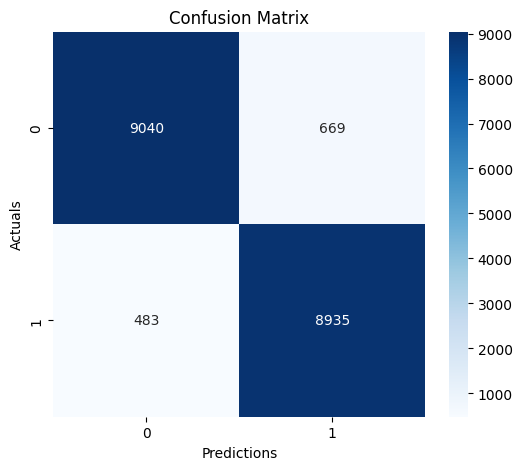

In [505]:
cm = confusion_matrix(lr_y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

##### ROC Curve

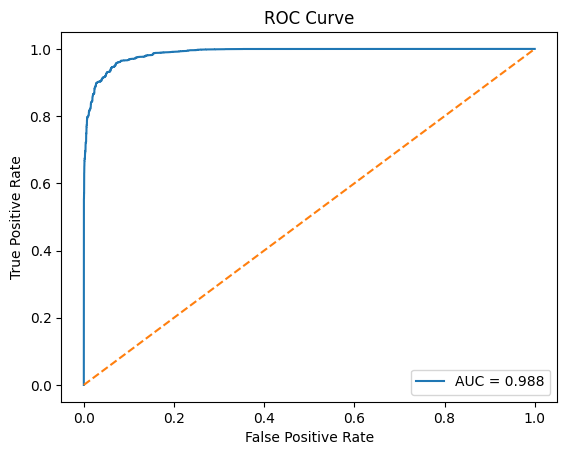

In [506]:
fpr, tpr, _ = roc_curve(lr_y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

AUC ~0.988 indicates excellent discrimination: the model almost perfectly separates the "0" and "1" classes.

The curve rises quickly (high TPR) with little penalty in FPR, which means that at low classification thresholds, the model captures most positives without generating many false alarms.

#### Error Analysis

- False positive (`y_pred = 1, y_true = 0`)
- False negative (`y_pred = 0, y_true = 1`)

In [507]:
df_test = lr_X_test.copy()
df_test['y_true'] = lr_y_test
df_test['y_pred'] = y_pred

fp = df_test[(df_test.y_pred==1) & (df_test.y_true==0)]
fn = df_test[(df_test.y_pred==0) & (df_test.y_true==1)]


Example of false positive:

In [508]:
display(fp.head(5))

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,y_true,y_pred
51693,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,67.0,0.0,1.0
34992,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,63.0,0.0,1.0
53206,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,69.0,0.0,1.0
31509,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,62.0,0.0,1.0
12941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,1.0


Example of false negative:

In [509]:
display(fn.head(5))

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,y_true,y_pred
65587,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,48.0,1.0,0.0
16345,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0,1.0,0.0
25945,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,45.0,1.0,0.0
18574,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,49.0,1.0,0.0
4846,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,49.0,1.0,0.0


#### Global explainability

- Importance of features using Permutation Importance
- SHAP summary and dependence plots

In [510]:
from sklearn.inspection import permutation_importance

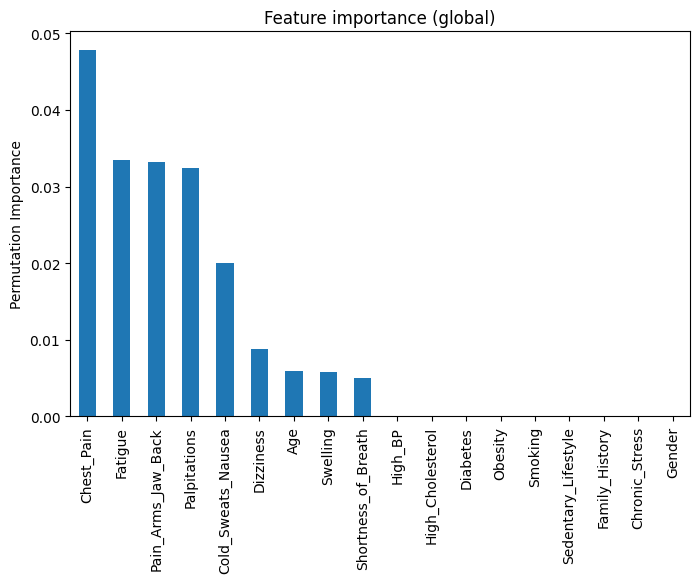

In [511]:
res = permutation_importance(model, lr_X_test, lr_y_test, n_repeats=10, random_state=0)
importances = pd.Series(res.importances_mean, index=lr_X_test.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.plot.bar()
plt.ylabel('Permutation Importance')
plt.title('Feature importance (global)')
plt.show()

#### Local explainability

In [512]:
def predict_fn(array_2d):
    df = pd.DataFrame(array_2d, columns=lr_X_train.columns)
    return lr_model.predict_proba(df)

In [513]:
from lime.lime_tabular import LimeTabularExplainer

explainer_lime = LimeTabularExplainer(
    training_data = lr_X_train.values,
    feature_names = lr_X_train.columns.tolist(),
    class_names = ['0','1'],
    discretize_continuous = True
)

i = 0
exp = explainer_lime.explain_instance(
    lr_X_test.values[i],
    predict_fn,
    num_features=5
)

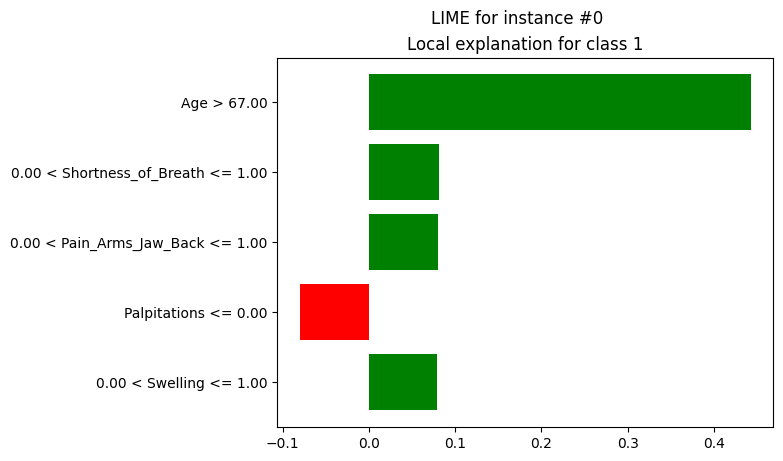

In [514]:
fig = exp.as_pyplot_figure()
fig.suptitle(f'LIME for instance #{i}')
plt.show()

In [515]:
print("Patient data:")
print(lr_X_test.iloc[i])

Patient data:
Chest_Pain              1.0
Shortness_of_Breath     1.0
Fatigue                 1.0
Palpitations            0.0
Dizziness               1.0
Swelling                1.0
Pain_Arms_Jaw_Back      1.0
Cold_Sweats_Nausea      1.0
High_BP                 1.0
High_Cholesterol        0.0
Diabetes                1.0
Smoking                 1.0
Obesity                 1.0
Sedentary_Lifestyle     1.0
Family_History          1.0
Chronic_Stress          0.0
Gender                  0.0
Age                    70.0
Name: 7687, dtype: float64
